# Explore here

First, load the data

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


I am going to get delete the time because they all seem to be the same

In [4]:
df['date'] = pd.to_datetime(df['date']).dt.date
df


,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633
...,...,...
361,2023-08-30,989.600354
362,2023-08-31,994.987326
363,2023-09-01,995.814415
364,2023-09-02,997.350214


In [5]:
df = df.set_index("date")
series = df["sales"]
series

date
2022-09-03      55.292157
2022-09-04      53.803211
2022-09-05      58.141693
2022-09-06      64.530899
2022-09-07      66.013633
                 ...     
2023-08-30     989.600354
2023-08-31     994.987326
2023-09-01     995.814415
2023-09-02     997.350214
2023-09-03    1000.482785
Name: sales, Length: 366, dtype: float64

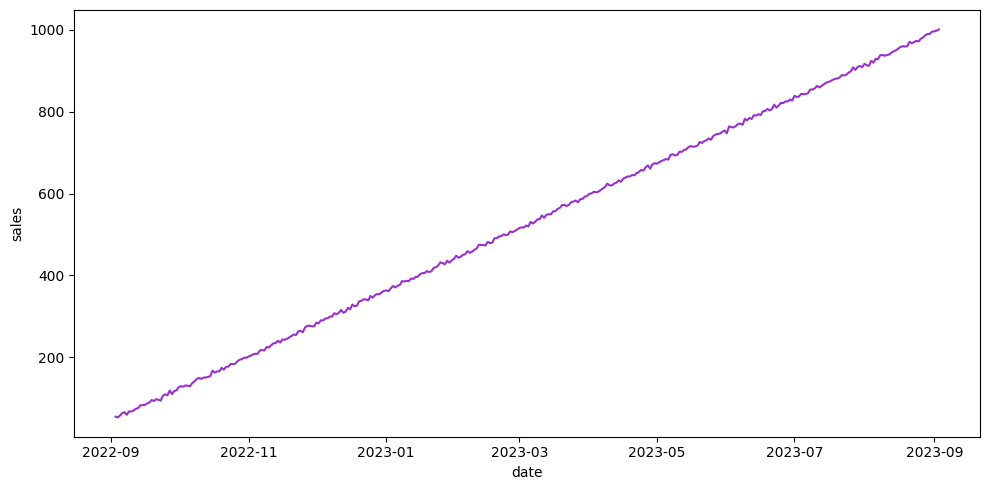

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')

plt.tight_layout()

plt.show()

Now we analyse the time series:

Trend: upward and lineal (no acceleration or deceleration)

Seasonality: None

Variasbility: None 

Outliers: not apparently

Inflection Points: none

Decomposition of the series:

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(series, period = 12)
decomposition

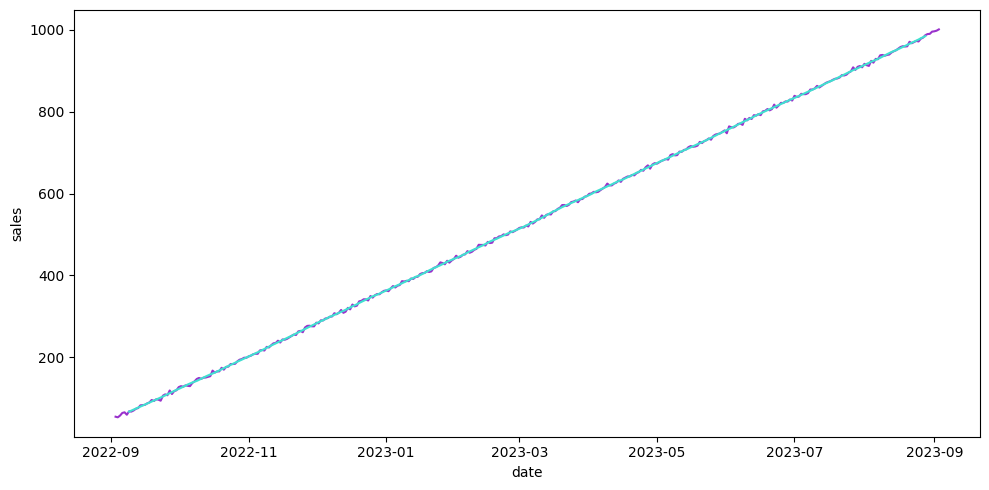

In [8]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')
sns.lineplot(data = trend, color= 'turquoise')

plt.tight_layout()

plt.show()

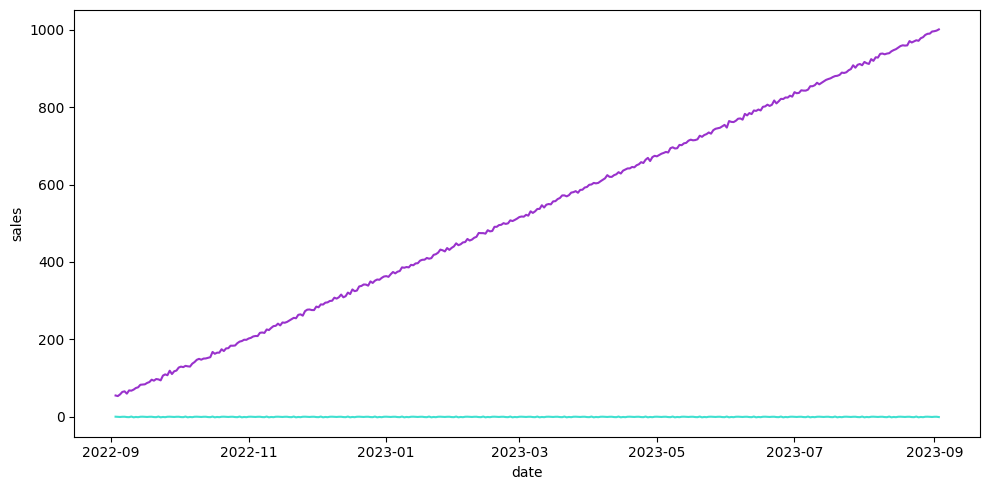

In [9]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')
sns.lineplot(data = seasonal, color= 'turquoise')

plt.tight_layout()

plt.show()

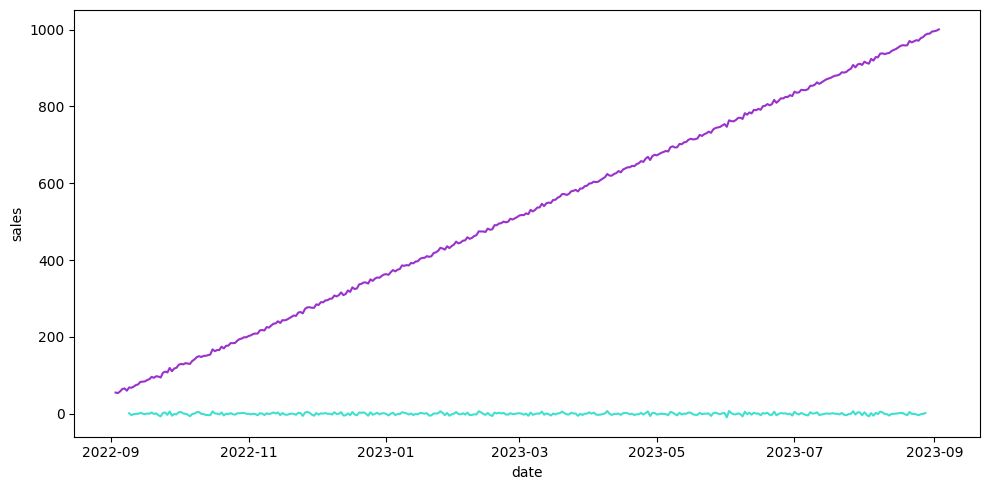

In [10]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')
sns.lineplot(data = residual, color= 'turquoise')


plt.tight_layout()

plt.show()

The three graphs above confirm what we assumed of the time series. 

To evaluate the seasonality we can also use the Dickey-Fuller test:

In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(series)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

The p-value here is 0.99, so we can say that the series is stationary. 

Autocorrelation:

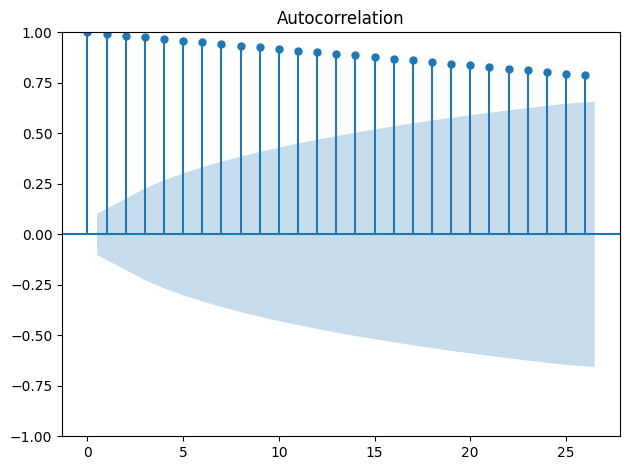

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series)

plt.tight_layout()

plt.show()

We can see in this graph that the autocorrelation betweem the points is gettig lower with time.

Model training (ARIMA):

Our series is already stationary so we don't need to transform it.

We use m = 7 because the data that we have follows a daily pattern 

In [13]:
from pmdarima import auto_arima

model = auto_arima(series, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2209.657, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=0.38 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.27 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=0.79 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=1.12 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=0.78 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=0.35 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=0.99 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=1

The best model in this case is ARIMA(3,1,1)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  366
Model:             SARIMAX(3, 1, 1)x(0, 0, [1, 2], 7)   Log Likelihood                -910.786
Date:                                Wed, 31 Jan 2024   AIC                           1837.572
Time:                                        12:10:50   BIC                           1868.771
Sample:                                    09-03-2022   HQIC                          1849.971
                                         - 09-03-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3358      0.259      9.010      0.000       1.828       2.844
ar.L1         -0.0343      0.052     -0.665      0.506      -0.135       0.067
ar.L2          0.0509      0.056      0.904      0.366      -0.059       0.161
ar.L3          0.0849      0.053      1.615      0.106      -0.018       0.188
ma.L1         -0.9894      0.023    -42.699      0.000      -1.035      -0.944
ma.S.L7        0.1618      0.052      3.092      0.002       0.059       0.264
ma.S.L14       0.0955      0.054      1.757      0.079      -0.011       0.202
sigma2         8.3218      0.641     12.978      0.000       7.065       9.579
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.72   Prob(JB):                         0.73
Heteroskedasticity (H):               0.88   Skew:                             0.06
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we predict:

I want to predict the next 4 months:

In [19]:
forecast = model.predict(120)
forecast

2023-09-04    1002.958038
2023-09-05    1005.123388
2023-09-06    1007.342280
2023-09-07    1010.276415
2023-09-08    1012.364725
                 ...     
2023-12-28    1301.032030
2023-12-29    1303.631603
2023-12-30    1306.231176
2023-12-31    1308.830748
2024-01-01    1311.430321
Freq: D, Length: 120, dtype: float64

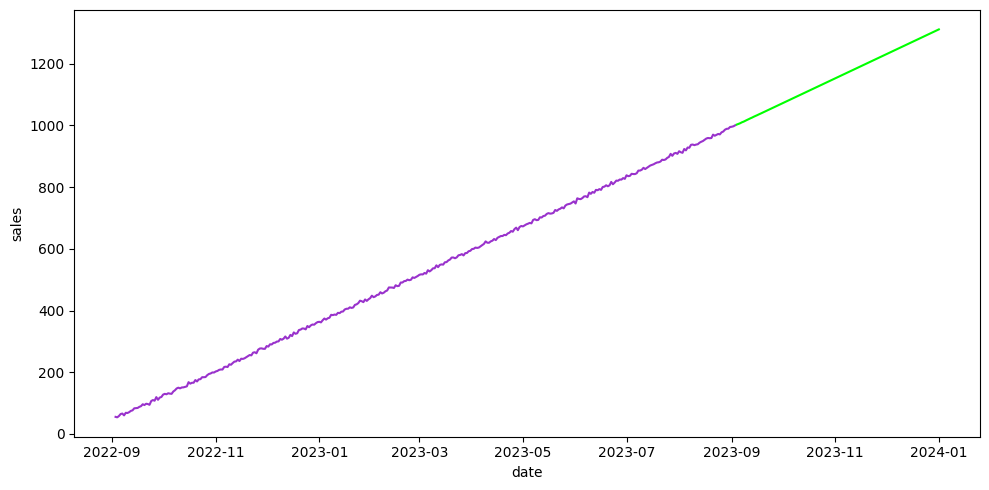

In [20]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color = 'darkorchid')
sns.lineplot(data = forecast, c = 'lime')

plt.tight_layout()

plt.show()

This is the expected result.

In [22]:
from pickle import dump

dump(model, open("/workspaces/TimeSeries/data/processed/TSmodel.sav", "wb"))